In [1]:
#Import basic library libraries

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv(r'C:\Users\ASUS\Downloads\Mall_Customers.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data_1=data.drop(columns='CustomerID')

In [6]:
data_1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
#datatype
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
#find missing values
data_1.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data_1.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

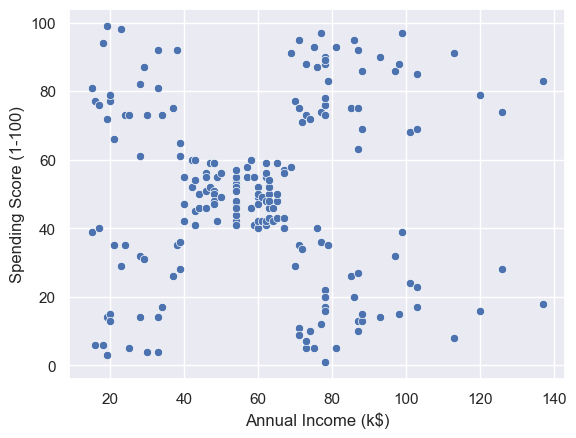

In [11]:
#Plotting the data

 

sns.scatterplot(data=data_1,x="Annual Income (k$)",y="Spending Score (1-100)")

<AxesSubplot:xlabel='Age', ylabel='Count'>

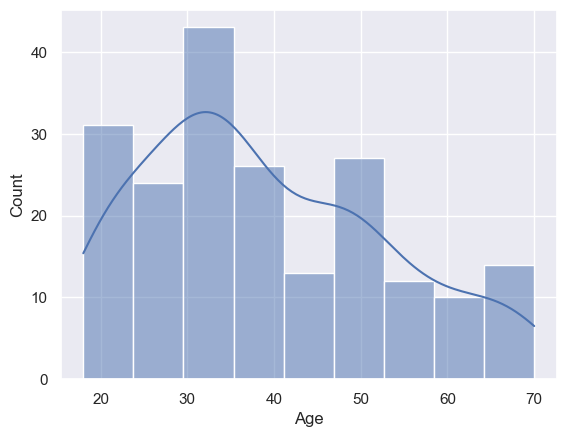

In [12]:
sns.histplot(data_1["Age"],kde=True)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

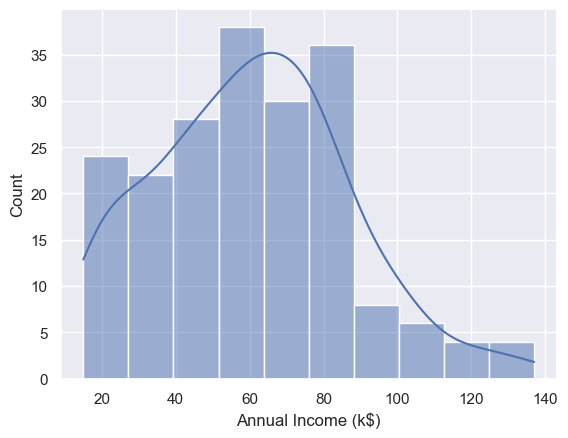

In [14]:
sns.histplot(data_1["Annual Income (k$)"],kde=True)

In [16]:
#creating dummy variables for gender

data_dummy=pd.get_dummies(data_1,columns=['Gender'],drop_first=True)

In [17]:
data_dummy.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [21]:
#libraray for clustering

from sklearn.cluster import KMeans

In [23]:
error=[]

 

for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(data_dummy)
    error.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


TypeError: 'str' object is not callable

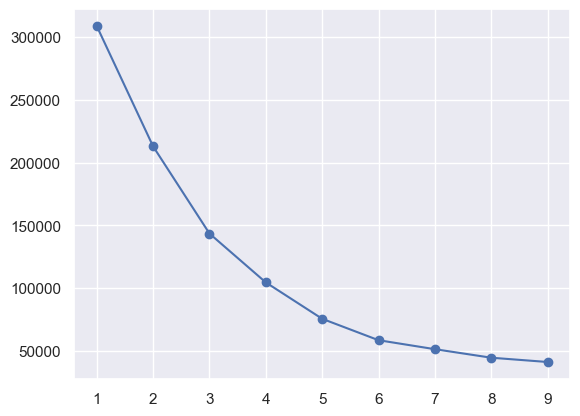

In [29]:
plt.plot(range(1,10),error,marker='o')
plt.title("Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("error")


In [42]:
#we select 5 clusters bcoz diff beteween  5 & 6 is minimal so we choose 5 we can also chooose 6.


In [31]:


#Train the data, build the model

 

KMeans_5=KMeans(n_clusters=5,init="k-means++").fit(data_dummy)

In [33]:


#predict on same data

 

Clusters=KMeans_5.fit_predict(data_dummy)

In [35]:
data['Clusters']=Clusters
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [36]:
data['Clusters'].value_counts()

4    79
2    39
0    36
3    23
1    23
Name: Clusters, dtype: int64

In [38]:
data.groupby("Clusters")[["Age","Annual Income (k$)","Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,
0,40.666667,87.750000,17.583333
1,25.521739,26.304348,78.565217
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,43.088608,55.291139,49.569620


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

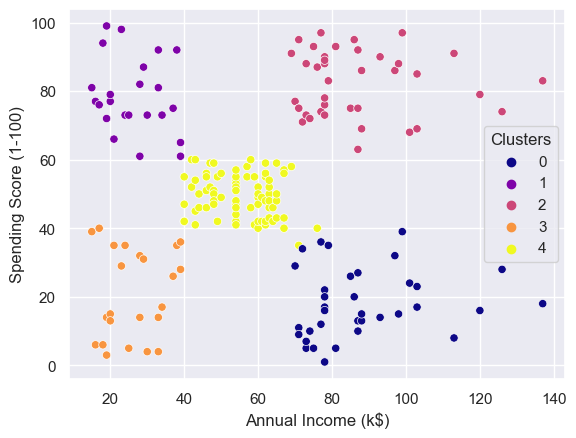

In [41]:
sns.scatterplot(x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"],hue=data["Clusters"],palette="plasma")